# Práctica Final Reconocimiento de Formas

* **Alumno 1**: Javier Barragán Haro
* **Alumno 2**: Victor Nieves Sanchez

## 1. Introducción
<div style="text-align: justify">

En esta práctica se pretende explicar lo aprendido hasta este momento en la asignatura de Reconocimiento de Formas.
<br>
Principalmente nos centraremos en la construcción de dos clasificadores (distancia euclídea y estadístico bayesiano), en su regularización, en la evaluación del rendimiento y por último, se enseñará una aplicación real de un OCR (_Reconocimiento Óptico de Caracteres_).
</div>

## 2. Clasificador de la distancia euclídea
<div style="text-align: justify">

Primero vamos a explicar qué se entiende por **distancia euclídea** o **euclidiana**. Es la distancia “ordinaria” entre dos puntos de un espacio eucídeo. La distancia se deduce a partír del teorema de Pitágoras.
<br>
En general, la distancia euclidiana entre los puntos $P=(p_1,p_2,...,p_n)$ y $Q=(q_1,q_2,...,q_n)$ del espacio euclídeo n-dimensional, se define como:
<div style="text-align: center">
$d_E(P,Q) = \sqrt{(p_2-q_1)^2+(p_2-q_1)^2 + ... + (p_n-q_n)^2}=\sum_{i=1}^{n}{(p_i-q_i)^2}$
</div>
<h3> Hipótesis </h3>
<li> La dispersión de las clases es pequeña en relación a la distancia entre ellas. Es decir, $d \gg \sigma$
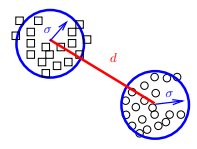</li>
<li> El centroide, $z_i$ es el representante de la clase
<div style="text-align: center">
    $z_i=\frac{1}{card(\alpha_i)}\sum_{\forall{x\in{\alpha_i}}}{x}$
    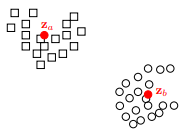</li>
</div>
<h3> Fundamentos </h3>
<li> Se asocia a cada clase una función de pertenencia $f_i(x)=d_E(x,z_i)$
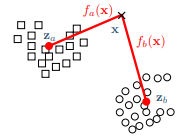</li>
<li> Se clasifica un objeto $x$ en la clase cuyo representante sea el más cercano $x \in \alpha_i$ tal que $i=argmin_j\{f_i(x)\}$</li>
</div>

In [1]:
# Código del clasificador euclídeo
import numpy as np
from abc import abstractmethod

class Classifier:

    @abstractmethod
    def fit(self,X,y):
        pass

    @abstractmethod
    def predict(self,X):
        pass


class ClassifEuclid(Classifier):
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase"""
        self.labels = labels
        self.centroids = []
        pass

    def fit(self, x, y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        self.centroids = np.array([np.mean(x[y==i], axis=0) for i in np.unique(y)])
        return self

    def predict(self, x):
        """Estima el grado de pertenencia de cada dato a todas las clases
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas.
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        return np.linalg.norm(self.centroids[:, np.newaxis] - x, axis=2)

    def pred_label(self, x):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmin(x,axis=0)

    def num_aciertos(self, x, y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        same_values = []
        [same_values.append(x[i] == y[i]) for i in range(0, len(self.labels))]
        number = same_values.count(True)
        return number, (number / len(x)) * 100

In [2]:
# ------ MNIST Database ------
from sklearn.datasets import fetch_openml
# 1. Cargar los datos de la base de datos de entrenamiento
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000].astype(int)

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(y)
classifEuclid.fit(X, y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)

correct = classifEuclid.num_aciertos(labels_matrix, list(y))
print("MNIST Database")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

MNIST Database
Correct answers: 48479 / 60000
Success rate: 80.79833333333333


In [3]:
import pandas as pd
# ------ Isolet Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y = pd.factorize(y)[0]

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(y)
classifEuclid.fit(X, y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)
correct = classifEuclid.num_aciertos(labels_matrix, y)
print("Isolet Database")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Isolet Database
Correct answers: 6843 / 7797
Success rate: 87.7645248172374


In [4]:
# --------- Iris database ---------
from sklearn.datasets import load_iris

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_iris()
samples = dataset.data
labels = dataset.target

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(labels)
classifEuclid.fit(samples, labels)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(samples)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)
correct = classifEuclid.num_aciertos(labels_matrix, labels)
print("Iris Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Iris Database
Correct answers: 139 / 150
Success rate: 92.66666666666666


In [5]:
# --------- Wine database ---------
from sklearn.datasets import load_wine

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_wine()
samples = dataset.data
labels = dataset.target

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(labels)
classifEuclid.fit(samples, labels)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(samples)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)
correct = classifEuclid.num_aciertos(labels_matrix, labels)
print("Wine Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Wine Database
Correct answers: 129 / 178
Success rate: 72.47191011235955


In [6]:
# --------- Cancer database ---------
from sklearn.datasets import load_breast_cancer

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_breast_cancer()
samples = dataset.data
labels = dataset.target

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(labels)
classifEuclid.fit(samples, labels)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(samples)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)
correct = classifEuclid.num_aciertos(labels_matrix, labels)
print("Cancer Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Cancer Database
Correct answers: 507 / 569
Success rate: 89.103690685413


Resumen de resultados:


| Base de datos | Número de aciertos | Porcentaje de aciertos (%) |
| --- | --- | --- |
| Iris   |  139 / 150 | 92.66 |
| Wine   | 129/178 | 72.47  |
| Cancer | 507/569 | 89.10 |
| MNIST  | 48479 / 60000 |80.80|
| Isolet | 6843 / 7797 | 87.76 |

## 3. Clasificador Estadístico Bayesiano
<div style="text-align: justify">
El clasificador de la distancia euclídea falla cuando no se cumple la hipótesis sobre la distribución de muestras.
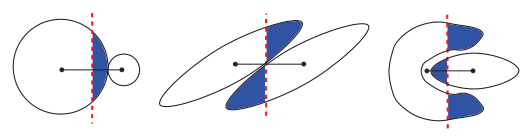
El **clasificador estadístico bayesiano** es el clasificador que minimiza la probabilidad de error.
<br>
El criterio de clasificación que minimiza la probabilidad de error asigna a un objeto a aquella clase cuya probabilidad a posteriori sea máxima.
<div style="text-align: center">
$f_i(x)=P(\alpha_i\mid x)= p(x\mid \alpha_i)*P(\alpha_i)$
</div>
</div>

In [7]:
# Código del clasificador estadístico bayesiano
class ClassifBayesiano(Classifier):
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase"""
        
        self.labels = labels
        self.ln_apriories = None
        self.means = None
        self.ln_determinants = None
        self.inv_covs = None
        
    def fit(self,X,y):
        """Entrena el clasificador. Dado que es un clasificador Gausiano Bayesiano, 
        se aprenderán los parámetros de las gausianas de cada clase.
        X: matriz numpy cada fila es un dato, cada columna una característica
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        
        assert X.ndim == 2 and X.shape[0] == len(y)
        
        y = pd.factorize(y)[0]
        
        # Contar cuantos ejemplos hay de cada etiqueta
        unique, counts = np.unique(y, return_counts=True)
        
        # Usando el contador de ejemplos de cada etiqueta, calcular el logaritmo neperiano de las probabilidades a-priori
        self.ln_apriories = np.array([np.log((counts[i]/np.sum(counts))) for i in unique])
        
        # Calcular para los ejemplos de cada clase, la media de cada una de sus características (centroide)
        self.means = np.array([np.mean(X[y==i], axis=0) for i in unique])
        
        # Sustraer a los ejemplos de cada clase su media y calcular su matriz de covarianzas (puedes emplear compresión de listas) 
        covs = np.array([np.cov(X[y==i] - self.means[i], rowvar=False) for i in unique])

        # Para cada una de las clases, calcular el logaritmo neperiano de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.ln_determinants = np.log(list(map(np.linalg.det, covs)))
        
        # Para cada una de las clases, calcular la inversa de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.inv_covs = np.array(list(map(np.linalg.pinv,covs)))

        return self

    def predict(self,X):
        """Estima el grado de pertenencia de cada dato a todas las clases 
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas. 
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase""" 
        
        assert self.means is not None, "Error: The classifier needs to be fitted. Please call fit(X, y) method."
        assert X.ndim == 2 and X.shape[1] == self.means.shape[1]

        # Resta la media de cada clase a cada ejemplo en X
        X_mean0 = self.means[:,np.newaxis,:] - X
        
        # Calcula el logaritmo de la función de decisión gausiana 
        return -0.5 * self.ln_determinants[:, np.newaxis] \
            - 0.5 * np.array([np.sum((X_mean0[i] @ self.inv_covs[i]) 
                                     * X_mean0[i], axis=1) for i in np.unique(y)]) \
            + self.ln_apriories[:, np.newaxis]
        
    def pred_label(self,X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmax(X, axis = 0)
    
    def num_aciertos(self, X): 
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar"""
        same_values = []
        [same_values.append(X[i] == self.labels[i]) for i in range(0, len(self.labels))]
        number = same_values.count(True)
        return number, (number / len(X)) * 100

In [8]:
# ------ Iris Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_iris()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayes = ClassifBayesiano(y)
ClassifBayes.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayes.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayes.pred_label(predict_matrix)

correct = ClassifBayes.num_aciertos(labels_matrix)
print("Iris Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Iris Dataset
Correct answers: 147 / 150
Success rate: 98.0


In [9]:
# ------ Wine Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_wine()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayes = ClassifBayesiano(y)
ClassifBayes.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayes.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayes.pred_label(predict_matrix)

correct = ClassifBayes.num_aciertos(labels_matrix)
print("Wine Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Wine Dataset
Correct answers: 177 / 178
Success rate: 99.43820224719101


In [10]:
# ------ Cancer Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_breast_cancer()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayes = ClassifBayesiano(y)
ClassifBayes.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayes.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayes.pred_label(predict_matrix)

correct = ClassifBayes.num_aciertos(labels_matrix)
print("Cancer Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Cancer Dataset
Correct answers: 554 / 569
Success rate: 97.36379613356766


In [11]:
# ------ MNIST Database ------
# 1. Cargamos MNIST desde internet ( https://www.openml.org/d/554 )
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000]
y = pd.factorize(y)[0]

# print("X: \n" + str(X))
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayes = ClassifBayesiano(y)
ClassifBayes.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayes.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayes.pred_label(predict_matrix)

correct = ClassifBayes.num_aciertos(labels_matrix)
print("MNIST Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

/home/victor/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


MNIST Dataset
Correct answers: 5421 / 60000
Success rate: 9.035


In [12]:
# ------ Isolet Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y = pd.factorize(y)[0]
#print("X: \n" + str(X))
#print("y: \n" + str(y))

# Nota: Si la matriz de covarianzas no tiene rango completo, no podrás invertirlas, 
# 2. Entrenar el clasificador
ClassifBayes = ClassifBayesiano(y)
ClassifBayes.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayes.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayes.pred_label(predict_matrix)

correct = ClassifBayes.num_aciertos(labels_matrix)
print("Isolet Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

/home/victor/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


Isolet Dataset
Correct answers: 300 / 7797
Success rate: 3.8476337052712584


Resumen de resultados obtenidos:

| Base de datos | Número de aciertos | Porcentaje de aciertos |
| --- | --- | --- |
| Iris   | 147 | 98.00 |
| Wine   | 177 | 99.43 |
| Cancer | 554 | 97.36 |
| MNIST  | 5421 / 60000 | 9.03 |
| Isolet | 300 / 7797 | 3.85 |


<div style="text-align: justify">
Vemos claramente una mejora en las bases de datos Iris, Wine y Cancer, pero en las otras dos (MNIST e Isolet) no, ya que el clasificador implementado no es capaz de clasificar todos los datos.
</div>

## 4. Regularización
\#TODO: Explica brevemente en qué consiste la regularización y justifica su necesidad.
### Clasificador Estadístico Bayesiano paramétrico
\#TODO: Explica brevemente en qué consiste 

In [13]:
# Código del clasificador estadístico bayesiano paramétrico
from sklearn.covariance import ShrunkCovariance
from sklearn import preprocessing

class ClassifBayesianoParametrico(Classifier):
    def __init__(self, share_covs=False, shrinkage=0.0):
        """Constructor de la clase
        share_covs: Indica si la matriz de covarianzas va a ser compartida entre las distintas clases.
        shrinkage: Parámetro que determina la diagonalidad de la matriz de covarianzas. Ver sklearn.covariance.ShrunkCovariance
        """
        assert 0 <= shrinkage <= 1
        self.labels = None
        self.ln_apriories = None
        self.means = None
        self.ln_determinants = None
        self.inv_covs = None
        self.share_covs = share_covs
        self.shrinkage = shrinkage
        self.scaler = preprocessing.StandardScaler()

    def fit(self, X, y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        assert X.ndim == 2 and X.shape[0] == len(y)
        self.labels = y
        # Aseguramos que las etiquetas son numeros tal que: [0, 1, ..., N]
        y = pd.factorize(y)[0]

        # Preprocesamos los datos de entrada
        X = self.scaler.fit_transform(X)       

        # Contar cuantos ejemplos hay de cada etiqueta
        unique, counts = np.unique(y, return_counts=True)
        
        # Usando el contador de ejemplos de cada etiqueta, calcular el logaritmo neperiano de las probabilidades a-priori
        self.ln_apriories = np.array([np.log((counts[i]/np.sum(counts))) for i in unique])
        
        # Calcular para los ejemplos de cada clase, la media de cada una de sus características (centroide)
        self.means = np.array([np.mean(X[y==i], axis=0) for i in unique])
        
        if self.share_covs:
            # Restamos al dato de cada clase su centroide
            X_mean = np.array([])
            for i in unique:
                X_mean = np.append(X_mean.reshape(-1, X.shape[1]), X[y==i] - self.means[i], axis=0)

            # Calcula la matriz de covarianzas empleando la clase ShrunkCovariance de sklearn
            cov = ShrunkCovariance(shrinkage=self.shrinkage).fit(X_mean).covariance_

            # La reproducimos tantas veces como número de clases
            covs = np.tile(cov, (len(unique), 1, 1))
         
        else:
            # Calcula la matriz de covarianzas empleando la clase ShrunkCovariance de sklearn
            covs = np.array([ShrunkCovariance(shrinkage=self.shrinkage).fit(X[y==i]).covariance_ for i in unique])

        # Para cada una de las clases, calcular el logaritmo neperiano de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.ln_determinants = np.log(list(map(np.linalg.det, covs)))
       
        # Para cada una de las clases, calcular la inversa de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.inv_covs = list(map(np.linalg.inv, covs))
        return self

    def predict(self, X):
        """Estima el grado de pertenencia de cada dato a todas las clases
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas.
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        
        assert self.means is not None, "Error: The classifier needs to be fitted. Please call fit(X, y) method."
        assert X.ndim == 2 and X.shape[1] == self.means.shape[1]

        # Preprocesamos nuestros datos
        X = self.scaler.fit_transform(X)        

        # Resta la media de cada clase a cada ejemplo en X
        new_X = self.means[:,np.newaxis,:] - X 
        
        # Calcula el logaritmo de la función de decisión gausiana
        return -0.5 * self.ln_determinants[:, np.newaxis] \
            - 0.5 * np.array([np.sum((new_X[i] @ self.inv_covs[i]) 
                                     * new_X[i], axis=1) for i in np.unique(y)]) \
            + self.ln_apriories[:, np.newaxis]
    
    def pred_label(self, X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmax(X, axis = 0)
    
    def num_aciertos(self, X): 
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar"""
        same_values = []
        [same_values.append(X[i] == self.labels[i]) for i in range(0, len(self.labels))]
        number = same_values.count(True)
        return number, (number / len(X)) * 100  

In [14]:
# ------ Iris Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target

# 2. Entrenar el clasificador
ClassifBayesP = ClassifBayesianoParametrico()
ClassifBayesP.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayesP.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayesP.pred_label(predict_matrix)

correct = ClassifBayesP.num_aciertos(labels_matrix)
print("Iris Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Iris Dataset
Correct answers: 147 / 150
Success rate: 98.0


In [15]:
# ------ Wine Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayesP = ClassifBayesianoParametrico()
ClassifBayesP.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayesP.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayesP.pred_label(predict_matrix)

correct = ClassifBayesP.num_aciertos(labels_matrix)
print("Wine Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Wine Dataset
Correct answers: 177 / 178
Success rate: 99.43820224719101


In [16]:
# ------ Cancer Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
# print("X: \n" + str(X))
y = dataset.target
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayesP = ClassifBayesianoParametrico()
ClassifBayesP.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayesP.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayesP.pred_label(predict_matrix)

correct = ClassifBayesP.num_aciertos(labels_matrix)
print("Cancer Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Cancer Dataset
Correct answers: 555 / 569
Success rate: 97.53954305799648


In [17]:
# ------ MNIST Database ------
# 1. Cargamos MNIST desde internet ( https://www.openml.org/d/554 )
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000]
y = pd.factorize(y)[0]

# print("X: \n" + str(X))
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayesP = ClassifBayesianoParametrico(share_covs=True, shrinkage=0.3)
ClassifBayesP.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayesP.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayesP.pred_label(predict_matrix)

correct = ClassifBayesP.num_aciertos(labels_matrix)
print("MNIST Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

MNIST Dataset
Correct answers: 52289 / 60000
Success rate: 87.14833333333334


In [18]:
# ------ Isolet Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y = pd.factorize(y)[0]
# print("X: \n" + str(X))
# print("y: \n" + str(y))

# 2. Entrenar el clasificador
ClassifBayesP = ClassifBayesianoParametrico(share_covs=True, shrinkage=0.26) 
ClassifBayesP.fit(X,y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = ClassifBayesP.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = ClassifBayesP.pred_label(predict_matrix)

correct = ClassifBayesP.num_aciertos(labels_matrix)
print("Isolet Dataset")
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Isolet Dataset
Correct answers: 7489 / 7797
Success rate: 96.04976272925484


Resumen de resultados:

| Base de datos | Número de aciertos | Porcentaje de aciertos |
| --- | --- | --- |
| Iris   |  147 / 150|98.00|
| Wine   | 177 / 178|99.44 | 
| Cancer | 555 / 569|97.54 |
| MNIST  | 52287 / 60000|87.15 |
| Isolet | 7489 / 7797 |  96.05 |

<div style="text-align: justify">
Como se puede observar, se han mejorado los resultados de todas las bases de datos respecto a las soluciones obtenidas con el clasificador de la distancia euclídea.
<br>
Esta mejora es debida a que el clasificador de la distancia euclídea no modela la distribución de las muestras en cada clase. Además, los datos que tienen mayor dispersión, no son clasificados correctamente (falla la hipótesis determinista).
</div>

## 5. Evaluación del Rendimiento
**Nota**: Se ha cambiado la implementación del Clasificador Bayesiano paramétrico para poder evaluar mejor el rendimiento.

In [24]:
class Classifier(BaseEstimator):

    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def predict(self, X):
        pass
class ClassifBayesianoParametrico(Classifier):
    def __init__(self, share_covs=False, shrinkage=0.0):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase"""
        assert 0 <= shrinkage <= 1
        self.labels = None
        self.ln_apriories = None
        self.means = None
        self.ln_determinants = None
        self.inv_covs = None
        self.share_covs = share_covs
        self.shrinkage = shrinkage
        self.scaler = preprocessing.StandardScaler()

    def fit(self, X, y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        assert X.ndim == 2 and X.shape[0] == len(y)
        assert np.max(y) < len(np.unique(y)), "Error: Las etiquetas deben ser enteros entre 0 y el número de clases.\n" \
                                              "Puedes hacer esto empleando:\ny = pd.factorize(y)[0]"
        # Entrena el clasificador

        # Preprocesamos los datos de entrada
        X = self.scaler.fit_transform(X)       

        # Contar cuantos ejemplos hay de cada etiqueta
        self.labels, counts = np.unique(y, return_counts=True)

        # Usando el contador de ejemplos de cada etiqueta, calcular el logaritmo neperiano de las probabilidades a-priori
        self.ln_apriories = np.array([np.log((counts[i]/np.sum(counts))) for i in self.labels])

        # Calcular para los ejemplos de cada clase, la media de cada una de sus características (centroide)
        self.means = np.array([np.mean(X[y==i], axis=0) for i in self.labels])
        
        if self.share_covs:
            # Restamos al dato de cada clase su centroide
            X_mean = np.array([])
            for i in self.labels:
                X_mean = np.append(X_mean.reshape(-1, X.shape[1]), X[y==i] - self.means[i], axis=0)

            # Calcula la matriz de covarianzas empleando la clase ShrunkCovariance de sklearn
            cov = ShrunkCovariance(shrinkage=self.shrinkage).fit(X_mean).covariance_

            # La reproducimos tantas veces como número de clases
            covs = np.tile(cov, (len(self.labels), 1, 1))
         
        else:
            # Calcula la matriz de covarianzas empleando la clase ShrunkCovariance de sklearn
            covs = np.array([ShrunkCovariance(shrinkage=self.shrinkage).fit(X[y==i]).covariance_ for i in self.labels])

        # Para cada una de las clases, calcular el logaritmo neperiano de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.ln_determinants = np.log(list(map(lambda x: np.linalg.det(x), covs)))

        # Para cada una de las clases, calcular la inversa de su matriz de covarianzas (puedes emplear compresión de listas o la función map)
        self.inv_covs = np.array(list(map(lambda x: np.linalg.pinv(x), covs)))

        return self

    def predict_proba(self, X):
        """Estima el grado de pertenencia de cada dato a todas las clases
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas.
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        assert self.means is not None, "Error: The classifier needs to be fitted. Please call fit(X, y) method."
        assert X.ndim == 2 and X.shape[1] == self.means.shape[1]
        
        # Calcula y devuelve la probabilidad de cada clase
        
        # Preprocesamos nuestros datos
        X = self.scaler.fit_transform(X)        

        # Resta la media de cada clase a cada ejemplo en X  
        X_mean0 = np.array(X[:, np.newaxis] - self.means)

        # Calcula el logaritmo de la función de decisión gausiana
        # -(1/2)ln|Sigma_i| - (1/2)*(x- mu_i)^T Sigma_i^-1 (x- mu_i) + lnP(alpha_i)
        grado_de_pertenencia = np.array(list(map(lambda x: -(1/2)*(self.ln_determinants 
                   + np.matmul(np.matmul(x.reshape(len(self.labels),1,X.shape[1]),self.inv_covs), 
                   x.reshape(len(self.labels),1,X.shape[1]).transpose(0,2,1)).reshape(len(self.labels)))
                   + self.ln_apriories, X_mean0)))

        return grado_de_pertenencia

    def predict(self, X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        # Calcula y devuelve la clase más probable
        return self.labels[np.argmax(self.predict_proba(X), axis=1)]

    def  num_aciertos(self,X,y):
        estimation = self.predict(X)
        aciertos = (estimation == y).sum()
        return aciertos, aciertos/len(y) * 100

In [25]:
from sklearn.base import BaseEstimator
def best_shrinkage_clf(X, y, k, shrinkages, share_covs):
    """
    Busca el clasificador bayesiano regularizado con el mejor shrinkage. 
    :param X: Ejemplos de la dase de datos
    :param y: Etiquetas de los ejemplos
    :param k: Número de divisiones en la validación cruzada (k-fold)
    :param shrinkages: Lista de posibles shrinkages que conforman la rejilla de búsqueda
    :param share_covs: Lista de posibles valores para share_covs que conforman la rejilla de búsqueda
    """
    from sklearn.model_selection import GridSearchCV
    cbp = ClassifBayesianoParametrico()
    params = {'shrinkage': shrinkages, 'share_covs': share_covs}
    clf = GridSearchCV(cbp, params, n_jobs=-2, scoring='accuracy', cv=k).fit(X, y)
    best_clf = clf.best_estimator_
    # print("Srinkage scores: ", clf.cv_results_['mean_test_score'])
    result_score_mean = clf.cv_results_['mean_test_score'][clf.best_index_]
    result_score_std = clf.cv_results_['std_test_score'][clf.best_index_]
    print("\tSelected shrinkage = {}, share_covs = {}\n" \
          "\tAccuracy: {:.3f} (+/- {:.3f})\n".format(best_clf.shrinkage,
                                                   best_clf.share_covs,
                                                   result_score_mean,
                                                   result_score_std))
    return best_clf

In [26]:
# ------ Iris Database ------
import sklearn
from time import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_iris()
X = dataset.data
y = pd.factorize(dataset.target)[0]


# 2. Baraja los datos para hacer validación cruzada
X, y = sklearn.utils.shuffle(X, y)

# Evaluar el clasificador de la distancia eucídea usando cross validation (k-fold=5)
k = 5
print("Iris Dataset")
print("\033[1m", "Clasificador Euclídeo", "\033[0m", "\n")
cde = SVC(kernel='linear', C=1).fit(X,y)
scoresCde = cross_val_score(cde, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCde.mean(), scoresCde.std() * 2), "\n")
mConfusionCde = confusion_matrix(y, cde.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador de la distancia euclidea: \n", mConfusionCde, "\n")

# Haz una selección de modelos para buscar shrinkage del clasificador 
# estadístico paramétrico que obtiene el mejor accuracy. Usa para ello cross validation (k-fold=5)
print("\033[1m", "Clasificador Estadístico Paramétrico", "\033[0m", "\n")

clf = best_shrinkage_clf(X, y, k, [1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.0], [True, False])
cbp = ClassifBayesianoParametrico(clf.share_covs, clf.shrinkage).fit(X,y)
scoresCbp = cross_val_score(cbp, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCbp.mean(), scoresCbp.std() * 2), "\n")

mConfusionCbp = confusion_matrix(y, cbp.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador bayesiano parametrico: \n", mConfusionCbp, "\n")

Iris Dataset
 Clasificador Euclídeo  

Accuracy: 0.97 (+/- 0.04) 

Matriz de confusión con clasificador de la distancia euclidea: 
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]] 

 Clasificador Estadístico Paramétrico  

	Selected shrinkage = 0.1, share_covs = True
	Accuracy: 0.953 (+/- 0.034)

Accuracy: 0.95 (+/- 0.07) 

Matriz de confusión con clasificador bayesiano parametrico: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]] 



In [27]:
# ------ Wine Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_wine()
X = dataset.data
y = pd.factorize(dataset.target)[0]

# 2. Baraja los datos para hacer validación cruzada
X, y = sklearn.utils.shuffle(X, y)

# Evaluar el clasificador de la distancia eucídea usando cross validation (k-fold=5)
k = 5
print("Wine Dataset")
print("\033[1m", "Clasificador Euclídeo", "\033[0m", "\n")
cde = SVC(kernel='linear', C=1).fit(X,y)
scoresCde = cross_val_score(cde, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCde.mean(), scoresCde.std() * 2), "\n")
mConfusionCde = confusion_matrix(y, cde.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador de la distancia euclidea: \n", mConfusionCde, "\n")

# Haz una selección de modelos para buscar shrinkage del clasificador 
# estadístico paramétrico que obtiene el mejor accuracy. Usa para ello cross validation (k-fold=5)
print("\033[1m", "Clasificador Estadístico Paramétrico", "\033[0m", "\n")

clf = best_shrinkage_clf(X, y, k, [1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.0], [True, False])
cbp = ClassifBayesianoParametrico(clf.share_covs, clf.shrinkage).fit(X,y)
scoresCbp = cross_val_score(cbp, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCbp.mean(), scoresCbp.std() * 2), "\n")
mConfusionCbp = confusion_matrix(y, cbp.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador bayesiano parametrico: \n", mConfusionCbp, "\n")

Wine Dataset
 Clasificador Euclídeo  

Accuracy: 0.94 (+/- 0.10) 

Matriz de confusión con clasificador de la distancia euclidea: 
 [[59  0  0]
 [ 0 70  1]
 [ 0  0 48]] 

 Clasificador Estadístico Paramétrico  

	Selected shrinkage = 0.2, share_covs = False
	Accuracy: 0.972 (+/- 0.018)

Accuracy: 0.97 (+/- 0.04) 

Matriz de confusión con clasificador bayesiano parametrico: 
 [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]] 



/home/victor/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
# ------ Cancer Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = pd.factorize(dataset.target)[0]

# 2. Baraja los datos para hacer validación cruzada
X, y = sklearn.utils.shuffle(X, y)

# Evaluar el clasificador de la distancia eucídea usando cross validation (k-fold=5)
k = 5
print("Cancer Dataset")
print("\033[1m", "Clasificador Euclídeo", "\033[0m", "\n")
cde = SVC(kernel='linear', C=1).fit(X,y)
scoresCde = cross_val_score(cde, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCde.mean(), scoresCde.std() * 2), "\n")
mConfusionCde = confusion_matrix(y, cde.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador de la distancia euclidea: \n", mConfusionCde, "\n")

# Haz una selección de modelos para buscar shrinkage del clasificador 
# estadístico paramétrico que obtiene el mejor accuracy. Usa para ello cross validation (k-fold=5)
print("\033[1m", "Clasificador Estadístico Paramétrico", "\033[0m", "\n")

clf = best_shrinkage_clf(X, y, k, [1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.0], [True, False])
cbp = ClassifBayesianoParametrico(clf.share_covs, clf.shrinkage).fit(X,y)
scoresCbp = cross_val_score(cbp, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCbp.mean(), scoresCbp.std() * 2), "\n")
mConfusionCbp = confusion_matrix(y, cbp.predict(X) , labels=np.unique(y))
print("Matriz de confusión con clasificador bayesiano parametrico: \n", mConfusionCbp, "\n")

Cancer Dataset
 Clasificador Euclídeo  

Accuracy: 0.95 (+/- 0.03) 

Matriz de confusión con clasificador de la distancia euclidea: 
 [[201  11]
 [  8 349]] 

 Clasificador Estadístico Paramétrico  

	Selected shrinkage = 0.5, share_covs = True
	Accuracy: 0.956 (+/- 0.025)

Accuracy: 0.96 (+/- 0.05) 

Matriz de confusión con clasificador bayesiano parametrico: 
 [[187  25]
 [  1 356]] 



In [29]:
class ExclusionSplitter:
    """Esta clase nos permite usar GridSearchCV con la evaluación por exclusion."""
    def __init__(self, train_indices, test_indices):
        self.train_indices = train_indices
        self.test_indices = test_indices

    def split(self, X, y=None, groups=None):
        return [(self.train_indices, self.test_indices)]

    def get_n_splits(self, X=None, y=None, groups=None):
        return 1

In [30]:
# ------ Isolet Database ------
import os
# 1. Cargar los datos de la base de datos de entrenamiento
isolet_dir = 'isolet_subsets'

train_indices = np.load(os.path.join(isolet_dir, 'isolet_train.npy'))
test_indices = np.load(os.path.join(isolet_dir, 'isolet_test.npy'))

# 1. Cargar los datos de la base de datos de entrenamiento
X_all, y_all = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y_all = pd.factorize(y_all)[0]
X_train, y_train = X_all[train_indices], y_all[train_indices]
X_test, y_test = X_all[test_indices], y_all[test_indices]
# Dado el tamaño de la BD vamos emplear Exclusión como método de evaluación
print("Isolet Dataset")

print("\033[1m", "Clasificador Euclídeo", "\033[0m", "\n")
# 2. Entrena el clasificador de la distancia eucídea empleando X_train e y_train
cde = ClassifEuclid()
cde.fit(X_train,y_train)

# 3. Evalua el rendimiento en la base de datos de entrenamiento (X_train, y_train)
scoresCde = cde.num_aciertos(X_train, y_train)
print("Entrenamiento C. distancia euclideo: ", scoresCde, "\n")

# 4. Evalua el rendimiento en la base de datos de test (X_test, y_test)
scoresCde = cde.num_aciertos(X_test, y_test)
print("Test C. distancia euclideo: ", scoresCde, "\n")

print("\033[1m", "Clasificador Estadístico Paramétrico", "\033[0m", "\n")
from sklearn.model_selection import GridSearchCV
# Creamos un objeto spliter para dividir la base de datos en Train y test
splitter = ExclusionSplitter(np.arange(0, len(X_train)), 
                             np.arange(len(X_train), len(X_train) + len(X_test)))

# Decidimos los parámetros que vamos a pasar a GridSearchCV para hacer la búsqueda en rejilla
# NOTA: Ten cuidado! Un gran número de celdas en la rejilla ralentizará la ejecución
# Ejemplo de uso: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
params = {'shrinkage': [1.0, 0.5, 0.0], 'share_covs': [True]}

# Definimos la búsqueda en rejilla. 
clf = GridSearchCV(ClassifBayesianoParametrico(), params, scoring='accuracy', cv=splitter, verbose=1)
# Ejecutamos la búsqueda
clf = clf.fit(X_all, y_all)
# Seleccionamos el clasificador que mojores resultados ha obtenido 
best_clf = clf.best_estimator_
# Mostramos los resultados
print("Srinkage scores: ", clf.cv_results_['mean_test_score'])
result_score_mean = clf.cv_results_['mean_test_score'][clf.best_index_]
result_score_std = clf.cv_results_['std_test_score'][clf.best_index_]
print("\tSelected shrinkage = {} Share covs = {} \n\tAccuracy: {:.3f} (+/- {:.3f})".format(best_clf.shrinkage,
                                                                                           best_clf.share_covs,
                                                                                           result_score_mean,
                                                                                           result_score_std))

Isolet Dataset
 Clasificador Euclídeo  

Entrenamiento C. distancia euclideo:  (0, 0.0) 

Test C. distancia euclideo:  (0, 0.0) 

 Clasificador Estadístico Paramétrico  

Fitting 1 folds for each of 3 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/victor/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.5s finished


Srinkage scores:  [0.87019231 0.93349359 0.03846154]
	Selected shrinkage = 0.5 Share covs = True 
	Accuracy: 0.933 (+/- 0.000)


In [31]:
# ------ MNIST Database ------

import idx2numpy

def load_mnsit_data(mnist_dir='MNIST', training_split=True):
    """
    This function load the MNIST dataset from a disk directory.
    :param mnist_dir: The directory where the MNIST Dataset is stored. The directory should contain the sub-directories:
        - t10k-images-idx3-ubyte
        - t10k-labels-idx1-ubyte
        - train-images-idx3-ubyte
        - train-labels-idx1-ubyte
    :param training_split: True if we want to load the training examples and data, False for testing.
    :return: A tuple with the training examples X in the first element and the y labels in the second one.
    """
    assert type(mnist_dir) == str and type(training_split) == bool
    assert os.path.isdir(mnist_dir), "Error: The directory \"{}\" does not exists.".format(mnist_dir)
    file = os.path.join(mnist_dir, 'train-images-idx3-ubyte' if training_split else 't10k-images-idx3-ubyte', 'data')
    X = idx2numpy.convert_from_file(file)
    X = X.reshape(X.shape[0], -1).astype(float)
    file = os.path.join(mnist_dir, 'train-labels-idx1-ubyte' if training_split else 't10k-labels-idx1-ubyte', 'data')
    y = idx2numpy.convert_from_file(file)
    return X, y

drive_dir = 'mnist'
X_train, y_train = load_mnsit_data(drive_dir, training_split=True)
X_test, y_test = load_mnsit_data(drive_dir, training_split=False)

# X_train, y_train = load_mnsit_data(training_split=True)
# X_test, y_test = load_mnsit_data(training_split=False)

X_all = np.append(X_train, X_test, axis=0)
y_all = np.append(y_train, y_test, axis=0)

print("MNIST Dataset")
# Dado el tamaño de la BD vamos emplear Exclusión como método de evaluación

print("\033[1m", "Clasificador Euclídeo", "\033[0m", "\n")
# 2. Entrena el clasificador de la distancia eucídea empleando X_train e y_train
cde = ClassifEuclid()
cde.fit(X_train,y_train)

# 3. Evalua el rendimiento en la base de datos de entrenamiento (X_train, y_train)
scoresCde = cde.num_aciertos(X_train, y_train)
print("Entrenamiento C. distancia euclideo: ", scoresCde, "\n")

# 4. Evalua el rendimiento en la base de datos de test (X_test, y_test)
scoresCde = cde.num_aciertos(X_test, y_test)
print("Test C. distancia euclideo: ", scoresCde, "\n")

print("\033[1m", "Clasificador Estadístico Paramétrico", "\033[0m", "\n")
from sklearn.model_selection import GridSearchCV

# Creamos un objeto spliter para dividir la base de datos en Train y test
splitter = ExclusionSplitter(np.arange(0, len(X_train)), 
                             np.arange(len(X_train), len(X_train) + len(X_test)))

# Decidimos los parámetros que vamos a pasar a GridSearchCV para hacer la búsqueda en rejilla
# NOTA: Ten cuidado! Un gran número de celdas en la rejilla ralentizará la ejecución
# Ejemplo de uso: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
params = {'shrinkage': [1.0, 0.5, 0.0], 'share_covs': [True]}

# Definimos la búsqueda en rejilla. 
clf = GridSearchCV(ClassifBayesianoParametrico(), params, scoring='accuracy', cv=splitter, verbose=1)
# Ejecutamos la búsqueda
clf = clf.fit(X_all, y_all)
# Seleccionamos el clasificador que mojores resultados ha obtenido 
best_clf = clf.best_estimator_
# Mostramos los resultados
print("Srinkage scores: ", clf.cv_results_['mean_test_score'])
result_score_mean = clf.cv_results_['mean_test_score'][clf.best_index_]
result_score_std = clf.cv_results_['std_test_score'][clf.best_index_]
print("\tSelected shrinkage = {} Share covs = {} \n\tAccuracy: {:.3f} (+/- {:.3f})".format(best_clf.shrinkage,
                                                                                           best_clf.share_covs,
                                                                                           result_score_mean,
                                                                                           result_score_std))

MNIST Dataset
 Clasificador Euclídeo  

Entrenamiento C. distancia euclideo:  (0, 0.0) 

Test C. distancia euclideo:  (0, 0.0) 

 Clasificador Estadístico Paramétrico  

Fitting 1 folds for each of 3 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/victor/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished


Srinkage scores:  [0.8086 0.8726 0.098 ]
	Selected shrinkage = 0.5 Share covs = True 
	Accuracy: 0.873 (+/- 0.000)


Los resultados obtenidos son:

| Base de datos | Accuracy | Desviación Típica |
| --- | --- | --- |
| Iris   |0.96|0.05|
| Wine   | 0.98|0.05|
| Cancer |0.95|0.05|
| MNIST  | 0.873| 0.0|
| Isolet |0.933|0.0|

\#TODO: Razona por qué esta estimación del
rendimiento está sesgada y qué habría que hacer para obtener una estimación más ajustada.

## 6. Aplicación en un caso real de reconocimiento de texto
Para mayor comodidad, este apartado estará en un único notebook llamado "**_6 Aplicacion OCR.ipynb_**".

## 7. Conclusiones
\#TODO: Contar algo
### Dificultades
\#TODO: Contar que nos ha costado, especial la parte 6 del OCR y que la 5 nos ha dado fallos ...